# UAS Data Mining _Latent Dirichlet Allocation_

Sebagai salah satu syarat kelulus mata kuliah data Mining, maka dengan ini saya

<div style="display: inline-block">

| Ket | Nilai |
| :--- | :--- |
| Nama | Muhammad Farras Ma'ruf |
| Kelas | MKME02 |
| NIM | 241012050065 |

</div>

In [3]:
# Import time
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Load the data
Saya menggunakan data dari google API, udah di download, tinggal panggil datanya

In [15]:
# df = pd.DataFrame.from_dict(comments)

df = pd.read_csv('Data/komentar_tom_v_mul.csv')
# df['real_index'] = df.index
# df = df.drop(columns=['Unnamed: 0'])
df.head()

,Unnamed: 0,publishedAt,author,comment
0,0,2025-07-04T11:13:26Z,@Zea-bt7nn,"Keburukan mulyono pelan"" menumpuk 😂"
1,1,2025-07-04T07:46:48Z,@kiyarevinalisya,Satu persatu runtuh kedinastiannya.dari sedere...
2,2,2025-07-04T05:46:36Z,@cuwiwie8743,"Rakyat sdh tau ,klu hukum g tebang pilih,coba ..."
3,3,2025-07-04T04:37:19Z,@ringgorusmayadi2809,Inilah contoh kebijakan pemimpin yg dungu dan...
4,4,2025-07-04T03:10:22Z,@Benindriyana,Blunder lagi. Kasus yg itu blm selesai muncul ...


### Fungsi pembantu

In [24]:
def clean_text(text):
    """Doc cleaning"""
    
    # Lowering text
    text = text.lower()
    
    # Removing punctuation
    text = "".join([c for c in text if c not in PUNCTUATION])
    
    # Removing whitespace and newlines
    text = re.sub('\\s+',' ',text)
    
    return text

def sort_coo(coo_matrix):
    """Sort a dict with highest score"""
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature, score
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

def get_keywords(vectorizer, feature_names, doc):
    #generate tf-idf
    tf_idf_vector = vectorizer.transform([doc])
    
    #mengurutkan tf-idf vectors dengan descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #Hanya mengambil 10 kalimat paling sering muncul
    keywords=extract_topn_from_vector(feature_names,sorted_items,10)
    
    return list(keywords.keys())

In [17]:
# Static variable
PUNCTUATION = """!"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"""

In [18]:
stopwords_list = stopwords.words('indonesian')
extendList = ['yg','dsb','haha','ma','lo','mul','kau','kan','si','ga','lagi'] 
stopwords_list.extend(extendList)

In [19]:
### Calculate

In [20]:
deskripsi = df.comment.to_list()

vectorizer = TfidfVectorizer(stop_words=stopwords_list, smooth_idf=True, use_idf=True)# Creating vocab with our corpora
# Exlcluding first 10 docs for testing purpose
vectorizer.fit_transform(deskripsi)

# Storing vocab
feature_names = vectorizer.get_feature_names_out()

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [21]:
df

,Unnamed: 0,publishedAt,author,comment
0,0,2025-07-04T11:13:26Z,@Zea-bt7nn,"Keburukan mulyono pelan"" menumpuk 😂"
1,1,2025-07-04T07:46:48Z,@kiyarevinalisya,Satu persatu runtuh kedinastiannya.dari sedere...
2,2,2025-07-04T05:46:36Z,@cuwiwie8743,"Rakyat sdh tau ,klu hukum g tebang pilih,coba ..."
3,3,2025-07-04T04:37:19Z,@ringgorusmayadi2809,Inilah contoh kebijakan pemimpin yg dungu dan...
4,4,2025-07-04T03:10:22Z,@Benindriyana,Blunder lagi. Kasus yg itu blm selesai muncul ...
...,...,...,...,...
2525,2525,2025-06-30T09:22:13Z,@duanpanjo,Info dari FB soal MAHAKAM4D ternyata valid
2526,2526,2025-06-30T09:21:57Z,@KasDi-i7x,Mosso
2527,2527,2025-06-30T09:20:32Z,@SellyJelita69,ING NGARSO SUNG KORUPSI ING MADYA MANGUN DINAS...
2528,2528,2025-06-30T09:20:00Z,@gunturselangit3238,Sarkali lagi Satkali lagi


In [25]:
result = []
for doc in deskripsi:
    df = {}
    df['full_text'] = doc
    df['top_keywords'] = get_keywords(vectorizer, feature_names, doc)
    result.append(df)
    
final = pd.DataFrame(result)
final.index +=1
final

,full_text,top_keywords
1,"Keburukan mulyono pelan"" menumpuk 😂","[menumpuk, keburukan, pelan, mulyono]"
2,Satu persatu runtuh kedinastiannya.dari sedere...,"[sederet, runtuh, kedinastiannya, lgsg, pensiu..."
3,"Rakyat sdh tau ,klu hukum g tebang pilih,coba ...","[pnegakkn, dicina, buktikn, hukum, kyk, tebang..."
4,Inilah contoh kebijakan pemimpin yg dungu dan...,"[dongo, bla, pemimpinnya, dungu, bawahannya, d..."
5,Blunder lagi. Kasus yg itu blm selesai muncul ...,"[tercinta, menuai, menabur, blunder, damai, pe..."
...,...,...
2526,Info dari FB soal MAHAKAM4D ternyata valid,"[mahakam4d, fb, valid, info]"
2527,Mosso,[mosso]
2528,ING NGARSO SUNG KORUPSI ING MADYA MANGUN DINAS...,"[ing, cawe, wuri, sung, ngarso, mangun, madya,..."
2529,Sarkali lagi Satkali lagi,"[satkali, sarkali]"


## Bags of words kalimat spamm

In [33]:
topKeywordsSpam = final[final.index % 3 == 0].top_keywords
# Append datra
list_spam_top_list_words = [' '.join(a) for a in topKeywordsSpam]
string_spam_topList_words =' '.join(list_spam_top_list_words)

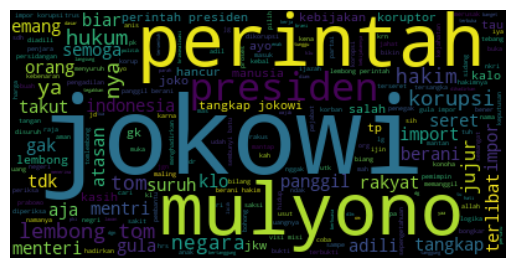

In [28]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(string_spam_topList_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
lda_model=LatentDirichletAllocation(n_components=30,learning_method='online',random_state=42,max_iter=1) 

In [30]:
vect_text=vectorizer.fit_transform(final['full_text'])

vect_text

<2530x5497 sparse matrix of type '<class 'numpy.float64'>'
	with 20059 stored elements in Compressed Sparse Row format>

In [31]:
lda_top=lda_model.fit_transform(vect_text)
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(2530, 30)
[[0.01138581 0.01138581 0.01138581 ... 0.01138581 0.01138581 0.01138581]
 [0.00786635 0.00786635 0.00786635 ... 0.00786635 0.00786635 0.00786635]
 [0.00759871 0.00759871 0.00759871 ... 0.00759871 0.00759871 0.00759871]
 ...
 [0.00847856 0.00847856 0.00847856 ... 0.00847856 0.56057237 0.00847856]
 [0.01380712 0.01380712 0.01380712 ... 0.01380712 0.01380712 0.01380712]
 [0.01220085 0.01220085 0.01220085 ... 0.01220085 0.01220085 0.01220085]]


In [32]:
# most important words for each topic
vocab = vectorizer.get_feature_names_out()

for i, comp in enumerate(lda_model.components_,1):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    if i % 3 == 0:
        print("Topic "+str(i)+": ")
        for t in sorted_words:
            print(t[0],end=" ")
        print("\n")

Topic 3: 
he ayooooo kacao heh tannya ngomong terbesar atasnya tunduk mo 

Topic 6: 
terkejut apbn tempe terkuras rampok pas maling tmbh rekaman bukti2 

Topic 9: 
biang kerok rakus keterangan jokowi ujung ujungnya licik ayo ujung2 

Topic 12: 
bakar satkali sarkali logik dalamgnya sendrinya teerbongkar usiuuttt jpkowiiiiiiii adiliiiii 

Topic 15: 
jngn busuk bermuara akar ikan kepala kepalanya ketawan kaan anggaran 

Topic 18: 
tribun tembong mukidi2 serett nahhh mntfffffffffff bgmn diperintahkan jalannya kebenaran 

Topic 21: 
kuduga na terbongkar intinya perusahaan terbuka befita bansi bau tergantung 

Topic 24: 
lg lho jakowi asli eyaaahh pojokin coba krempeng hati2 mumet 

Topic 27: 
sumber semangat jokodok wkwkwk ngeri disalahkan boby atasannya bangsa om 

Topic 30: 
mantap sakit tutup keren wkwkwkw mulut pura² tom mukin kaum 

